DATA UNDERSTANDING

In [1]:
import pandas as pd
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv('heart.csv')

# Tampilkan 5 baris pertama data untuk pemahaman awal
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [2]:
# Melihat info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [3]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


DATA PREPARATION

In [4]:
data['class'] = data['class'].replace({'positive': 1, 'negative': 0})
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [5]:
data['class'].value_counts()

class
1    810
0    509
Name: count, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns='class')
y = data['class']

# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Setelah SMOTE, periksa kembali jumlah data
print(y_resampled.value_counts())

class
0    810
1    810
Name: count, dtype: int64


In [7]:
#membuat dataframe resample
resampled_data = pd.DataFrame(data={'class': y_resampled})
resampled_data = pd.concat([resampled_data, X_resampled], axis=1)

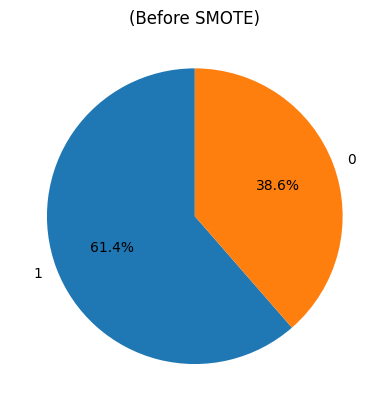

In [8]:
import matplotlib.pyplot as plt
class_counts = data['class'].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('(Before SMOTE)')
plt.show()


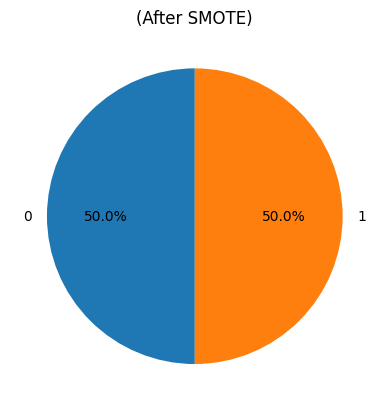

In [9]:
import matplotlib.pyplot as plt
class_counts = resampled_data['class'].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('(After SMOTE)')
plt.show()

In [10]:
data.to_csv('heartnew.csv', index=False)

data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


MODELLING

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=300)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)


In [12]:
import numpy as np

input_data = (46,1,22,85,44,160.0,1.8,0.012)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print ('Pasien tidak terkena penyakit jantung')
else:
    print ('Pasien terkena penyakit jantung')

[0]
Pasien tidak terkena penyakit jantung


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


EVALUATION

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9969135802469136
Confusion Matrix:
[[159   1]
 [  0 164]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       160
           1       0.99      1.00      1.00       164

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



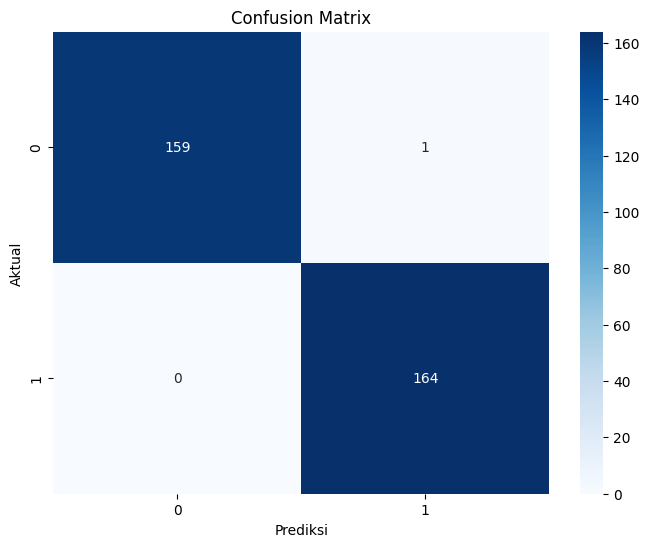

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

VISUALISASI POHON KEPUTUSAN

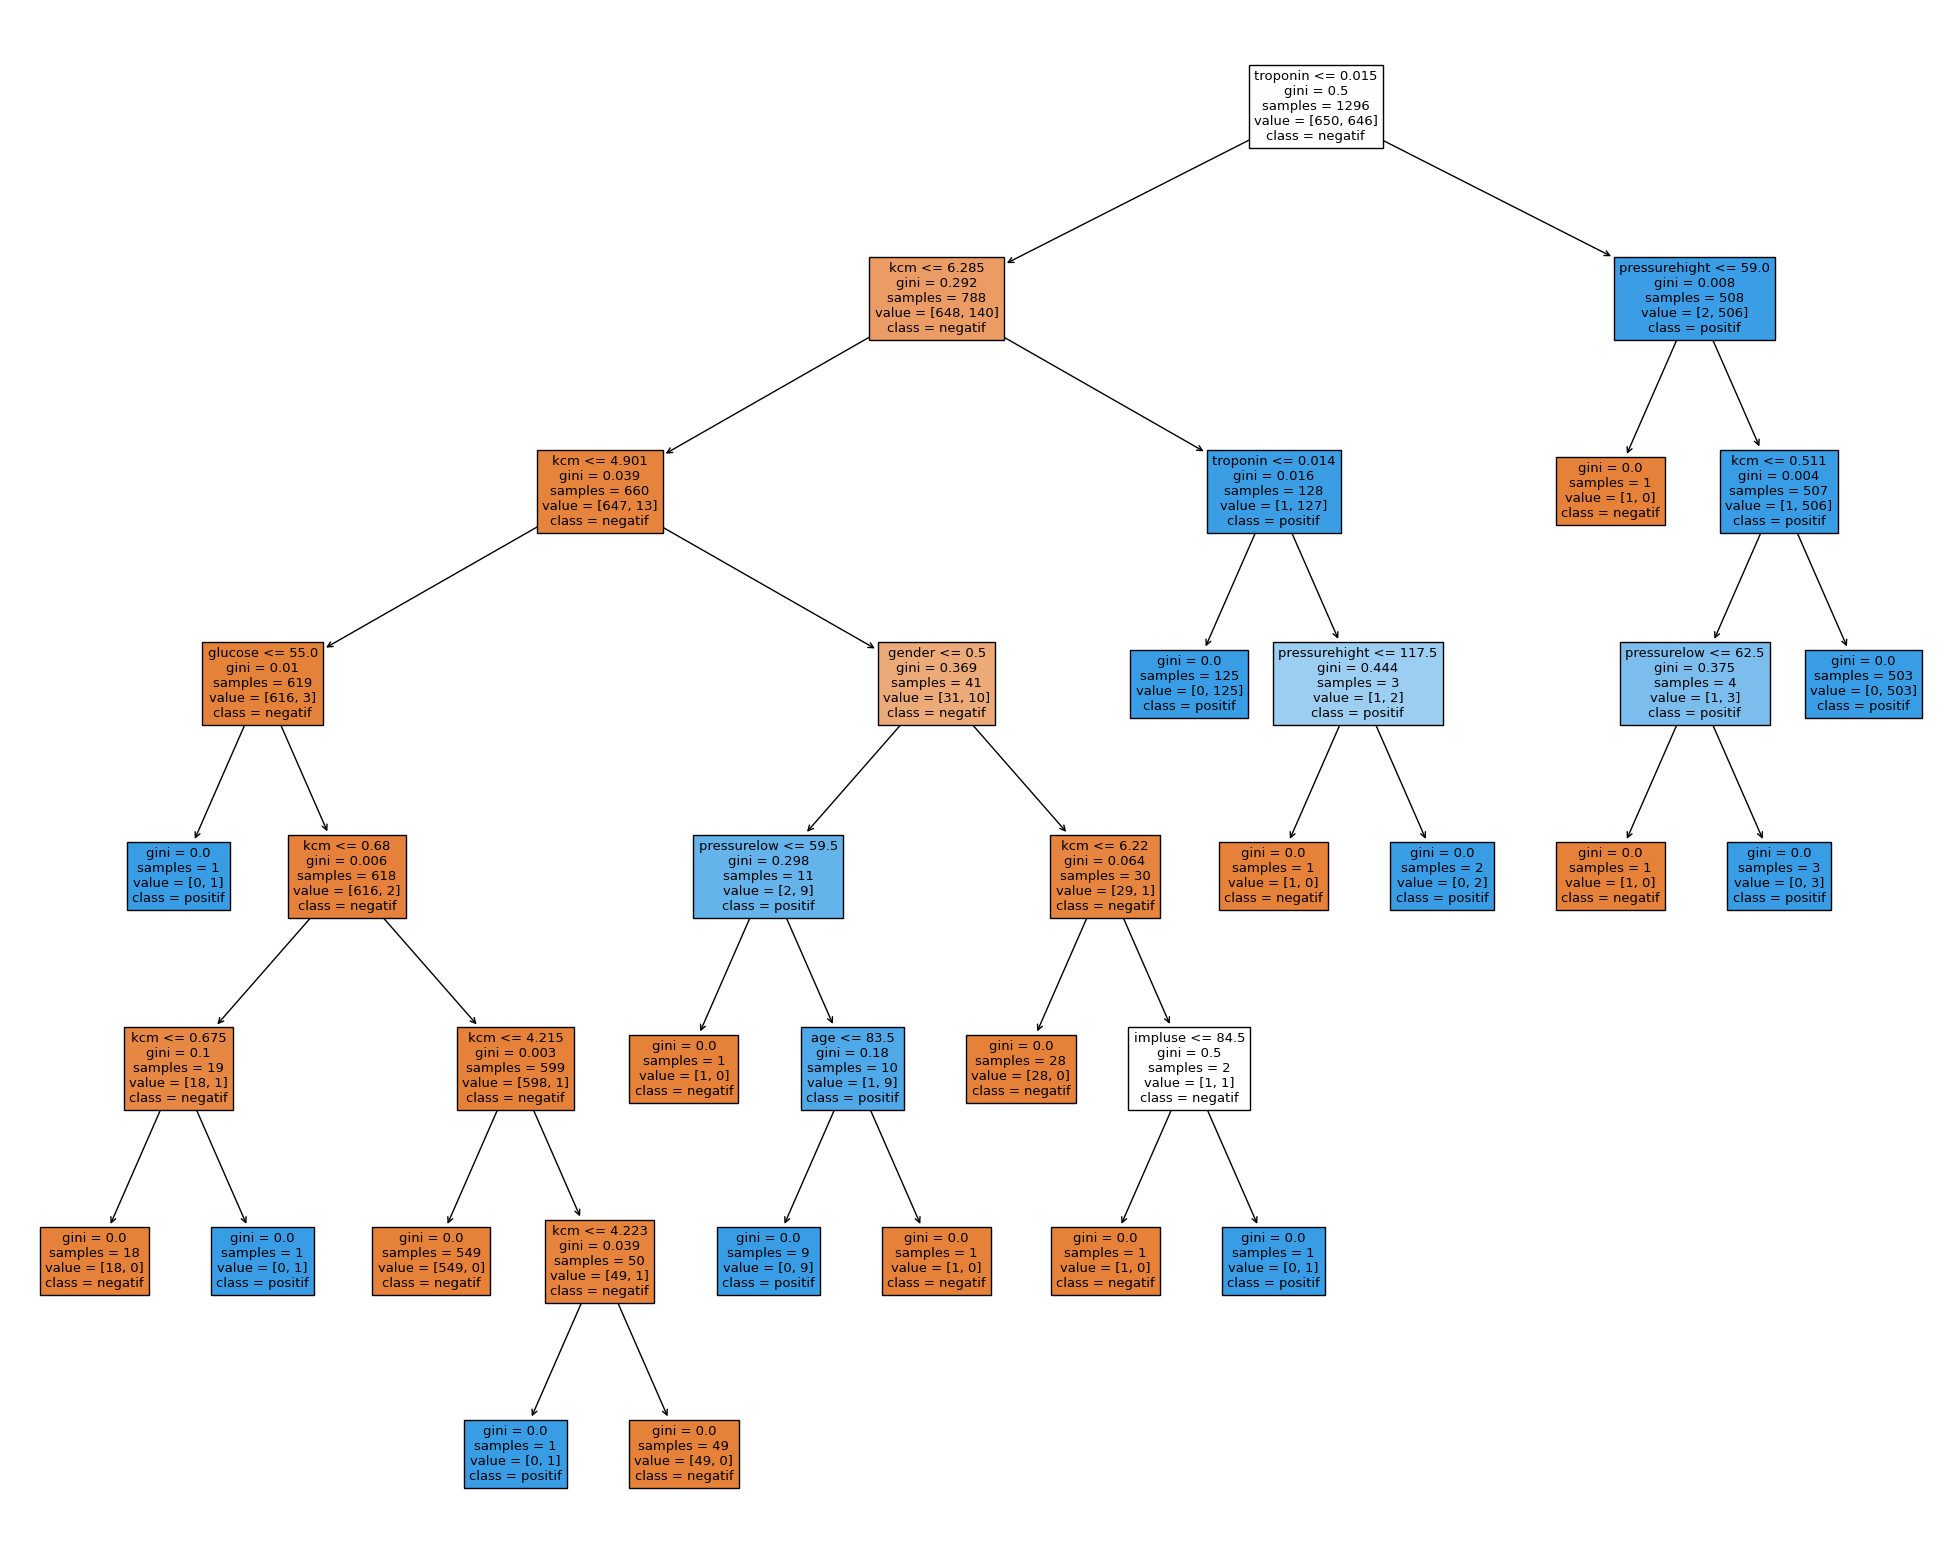

In [15]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names=X_train.columns,
                     class_names=['negatif','positif'],
                     filled=True)

SIMPAN MODEL

In [16]:
import pickle
filename = 'penyakit_jantung.sav'
pickle.dump(model,open(filename, 'wb'))